In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melanoma-cancer-dataset/test/Benign/6588.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6399.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6324.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/7222.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6560.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6943.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6365.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6459.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6653.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/7006.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6925.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/7245.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6800.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6899.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6831.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/7061.jpg
/kaggle/input/melanoma-cancer-dataset/test/Benign/6337.j

In [2]:
malignant_dir = '/kaggle/input/melanoma-cancer-dataset/train/Malignant'
benign_dir = '/kaggle/input/melanoma-cancer-dataset/train/Benign'

In [3]:
def load_image_paths_labels(malignant_dir, benign_dir):
    malignant_images = [(os.path.join(malignant_dir, img), 'Malignant') for img in os.listdir(malignant_dir)]
    benign_images = [(os.path.join(benign_dir, img), 'Benign') for img in os.listdir(benign_dir)]
    images_labels = malignant_images + benign_images
    return images_labels

In [4]:
image_data = load_image_paths_labels(malignant_dir, benign_dir)

In [5]:
df = pd.DataFrame(image_data, columns=['image_path', 'label'])

In [6]:
df.head()

,image_path,label
0,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant
1,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant
2,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant
3,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant
4,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant


In [7]:
df.tail()

,image_path,label
11874,/kaggle/input/melanoma-cancer-dataset/train/Be...,Benign
11875,/kaggle/input/melanoma-cancer-dataset/train/Be...,Benign
11876,/kaggle/input/melanoma-cancer-dataset/train/Be...,Benign
11877,/kaggle/input/melanoma-cancer-dataset/train/Be...,Benign
11878,/kaggle/input/melanoma-cancer-dataset/train/Be...,Benign


In [8]:
df.shape

(11879, 2)

In [9]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [12]:
df['label'].unique()

array(['Malignant', 'Benign'], dtype=object)

In [13]:
df['label'].value_counts()

label
Benign       6289
Malignant    5590
Name: count, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

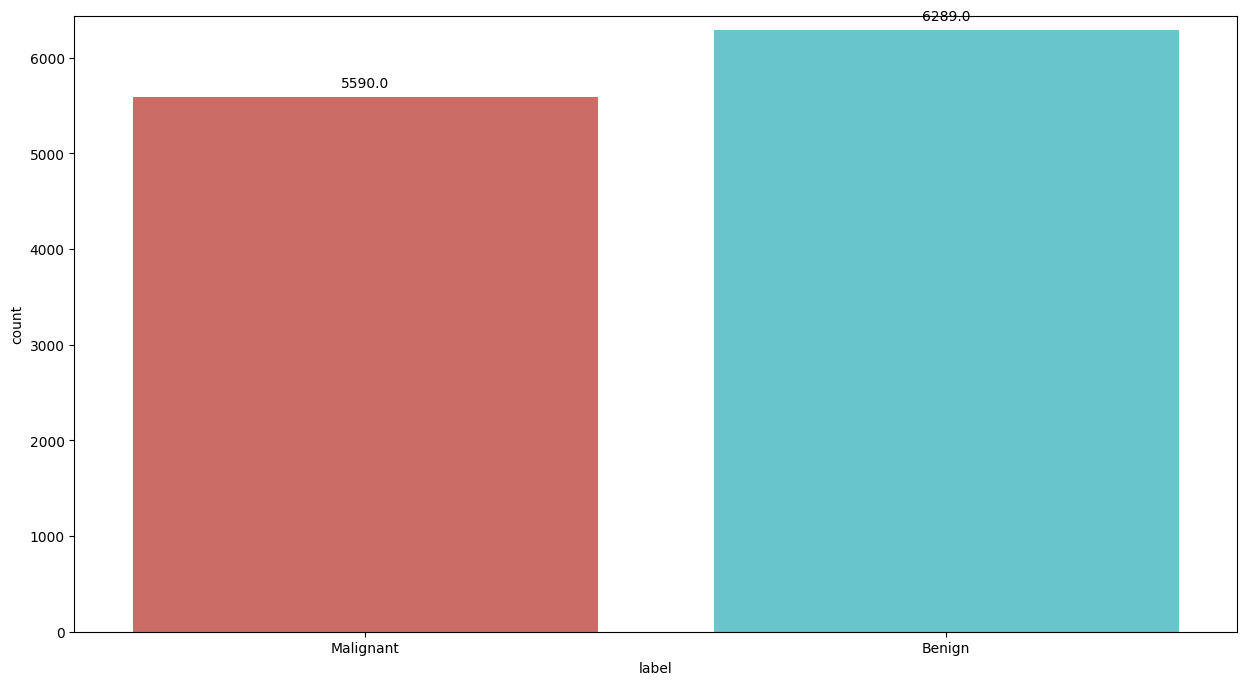

In [15]:
plt.figure(figsize=(15, 8))  

ax = sns.countplot(x='label', data=df, palette='hls')
ax.set_ylim(0, df['label'].value_counts().max() + 150)  

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2., height), 
                xytext=(0, 10),  
                textcoords='offset points', ha='center', va='center')

plt.show()

In [16]:
label_counts = df['label'].value_counts()

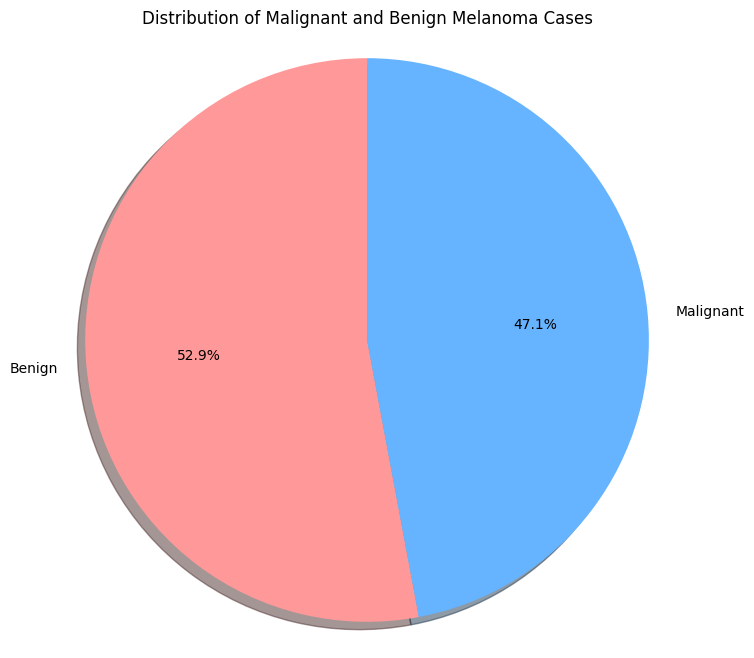

In [17]:
plt.figure(figsize=(8, 8)) 

plt.pie(label_counts, 
        labels=label_counts.index, 
        autopct='%1.1f%%',          
        startangle=90,             
        colors=['#ff9999','#66b3ff'], 
        shadow=True)           

plt.axis('equal')  
plt.title('Distribution of Malignant and Benign Melanoma Cases')
plt.show()

In [18]:
malignant_images = os.listdir(malignant_dir)
benign_images = os.listdir(benign_dir)

malignant_sample = np.random.choice(malignant_images, 5, replace=False)
benign_sample = np.random.choice(benign_images, 5, replace=False)

In [19]:
import matplotlib.image as mpimg

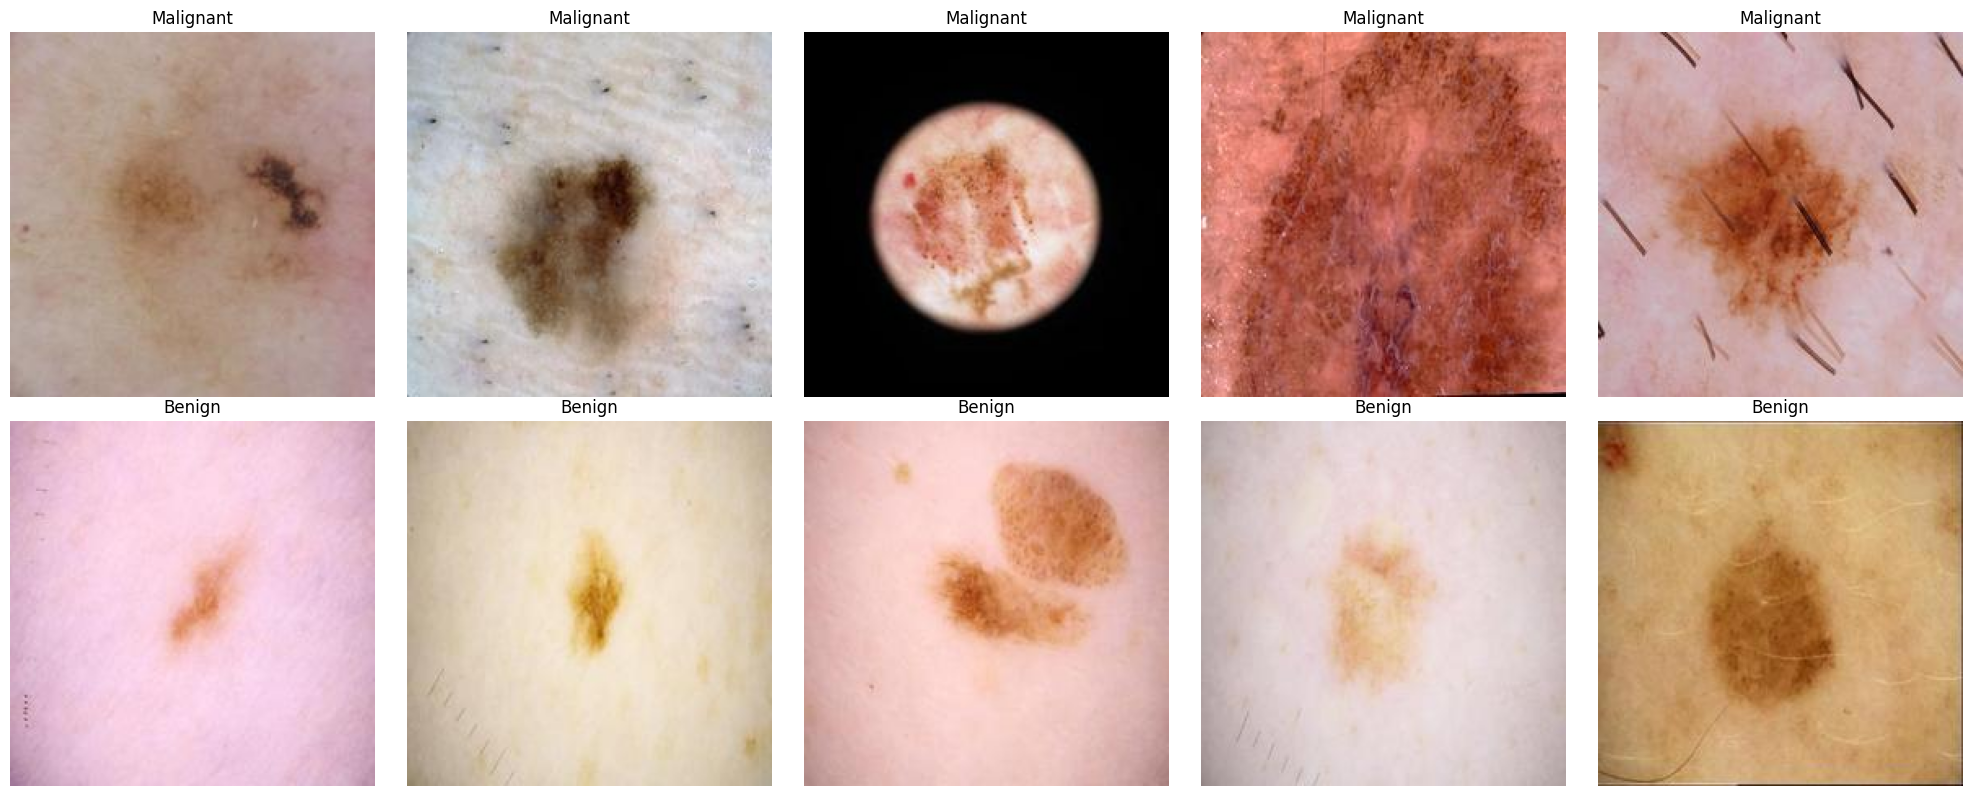

In [20]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8)) 

for ax, img_name in zip(axes[0], malignant_sample):
    img_path = os.path.join(malignant_dir, img_name)
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')  
    ax.set_title('Malignant')

for ax, img_name in zip(axes[1], benign_sample):
    img_path = os.path.join(benign_dir, img_name)
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')  
    ax.set_title('Benign')

plt.tight_layout()
plt.show()

In [21]:
from imblearn.over_sampling import RandomOverSampler

In [22]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['label'])

In [23]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['label'] = y_resampled

In [24]:
print("\nClass distribution after oversampling:")
print(df_resampled['label'].value_counts())


Class distribution after oversampling:
label
Malignant    6289
Benign       6289
Name: count, dtype: int64


In [25]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [26]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['label']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['label'] 
)

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3 
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',  
    y_col='label',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',  
    y_col='label',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path', 
    y_col='label',    
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 10062 validated image filenames belonging to 2 classes.
Found 1258 validated image filenames belonging to 2 classes.
Found 1258 validated image filenames belonging to 2 classes.


In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [36]:
def create_cnn_model(input_shape):
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid')) 

    return model

input_shape = (224, 224, 3)   

cnn_model = create_cnn_model(input_shape)

cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',  
                  metrics=['accuracy'])

In [37]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [39]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10


I0000 00:00:1729588558.928415     495 service.cc:145] XLA service 0x7e93140049a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729588558.928474     495 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729588558.928478     495 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  3/629 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.5243 - loss: 1.3999  

I0000 00:00:1729588563.166459     495 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


629/629 ━━━━━━━━━━━━━━━━━━━━ 67s 96ms/step - accuracy: 0.7391 - loss: 0.5452 - val_accuracy: 0.8537 - val_loss: 0.3358
Epoch 2/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8369 - loss: 0.3690 - val_accuracy: 0.8426 - val_loss: 0.3451
Epoch 3/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.8601 - loss: 0.3302 - val_accuracy: 0.8458 - val_loss: 0.3568
Epoch 4/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.8504 - loss: 0.3340 - val_accuracy: 0.8593 - val_loss: 0.3358
Epoch 5/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.8569 - loss: 0.3128 - val_accuracy: 0.8625 - val_loss: 0.3214
Epoch 6/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.8648 - loss: 0.3169 - val_accuracy: 0.8323 - val_loss: 0.3829
Epoch 7/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.8763 - loss: 0.2824 - val_accuracy: 0.8593 - val_loss: 0.3239
Epoch 8/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8837 - loss: 0.2724 - val_accurac

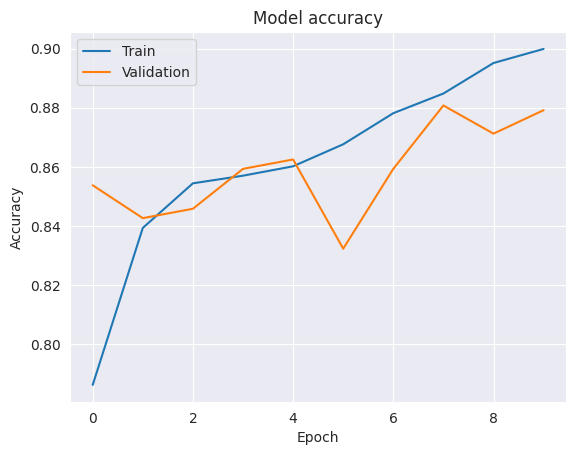

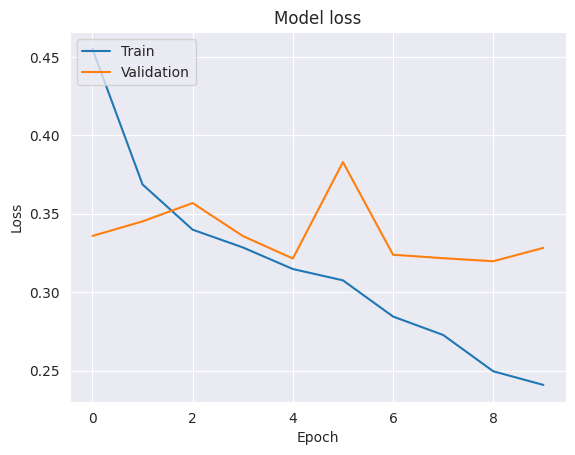

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [41]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step


In [42]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

      Benign       0.86      0.88      0.87       629
   Malignant       0.88      0.85      0.87       629

    accuracy                           0.87      1258
   macro avg       0.87      0.87      0.87      1258
weighted avg       0.87      0.87      0.87      1258



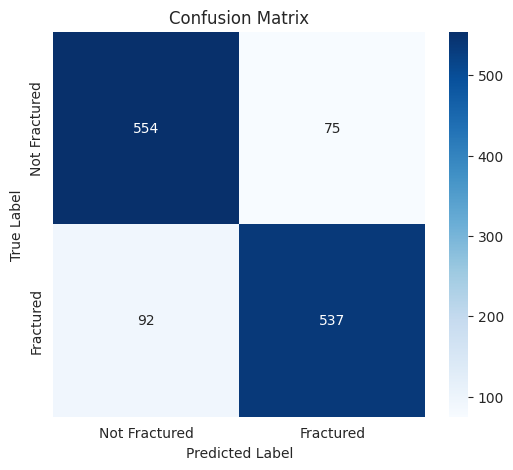

In [43]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [48]:
from tensorflow.keras import models, layers, regularizers

In [49]:
def create_cnn_model(input_shape):
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, 
                            kernel_regularizer=regularizers.l2(0.001)))  
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))  
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu', 
                            kernel_regularizer=regularizers.l2(0.001)))  
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))  
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu', 
                            kernel_regularizer=regularizers.l2(0.001)))  
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25)) 
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(128, activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)))  
    model.add(layers.Dropout(0.5)) 
    model.add(layers.Dense(1, activation='sigmoid')) 

    return model

input_shape = (224, 224, 3)  
num_classes = 1  

cnn_model = create_cnn_model(input_shape)

cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',  
                  metrics=['accuracy'])

In [50]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.6592 - loss: 1.1970 - val_accuracy: 0.7965 - val_loss: 0.6146
Epoch 2/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.8189 - loss: 0.5164 - val_accuracy: 0.8243 - val_loss: 0.5465
Epoch 3/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8201 - loss: 0.4959 - val_accuracy: 0.7909 - val_loss: 0.5115
Epoch 4/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.8231 - loss: 0.4594 - val_accuracy: 0.8450 - val_loss: 0.4743
Epoch 5/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.8371 - loss: 0.4437 - val_accuracy: 0.8362 - val_loss: 0.4590


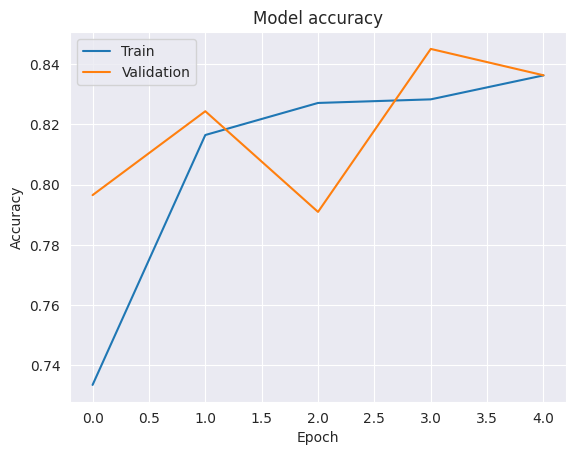

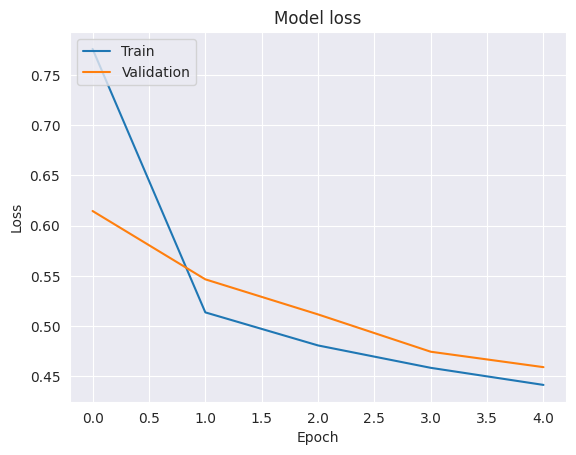

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [52]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


In [53]:
report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

      Benign       0.91      0.63      0.75       629
   Malignant       0.72      0.94      0.81       629

    accuracy                           0.79      1258
   macro avg       0.82      0.79      0.78      1258
weighted avg       0.82      0.79      0.78      1258



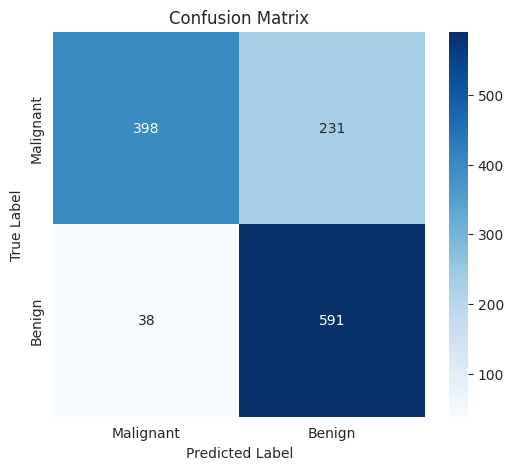

In [55]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [56]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_xception_model(input_shape):
    
    base_model = Xception(weights='imagenet', input_shape=input_shape, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(GaussianNoise(0.25))  
    model.add(GlobalAveragePooling2D())  
    model.add(Dense(512, activation='relu'))  
    model.add(BatchNormalization()) 
    model.add(GaussianNoise(0.25))  
    model.add(Dropout(0.25))  
    model.add(Dense(1, activation='sigmoid'))  

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [57]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 78s 97ms/step - accuracy: 0.7860 - loss: 0.4897 - val_accuracy: 0.8641 - val_loss: 0.3278
Epoch 2/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.8590 - loss: 0.3347 - val_accuracy: 0.8768 - val_loss: 0.3074
Epoch 3/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - accuracy: 0.8758 - loss: 0.2945 - val_accuracy: 0.8760 - val_loss: 0.3123
Epoch 4/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 83s 67ms/step - accuracy: 0.8856 - loss: 0.2739 - val_accuracy: 0.8752 - val_loss: 0.2933
Epoch 5/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.8927 - loss: 0.2578 - val_accuracy: 0.8831 - val_loss: 0.2869
Epoch 6/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.8926 - loss: 0.2599 - val_accuracy: 0.8847 - val_loss: 0.2827
Epoch 7/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - accuracy: 0.9089 - loss: 0.2282 - val_accuracy: 0.8808 - val_loss: 0.2843
Epoch 8/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9093 - loss: 0.2160 - 

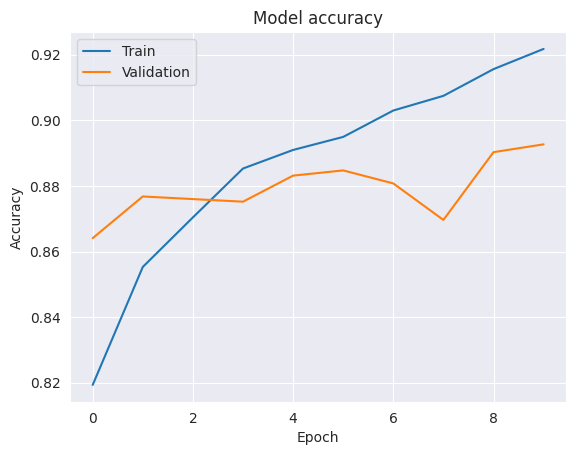

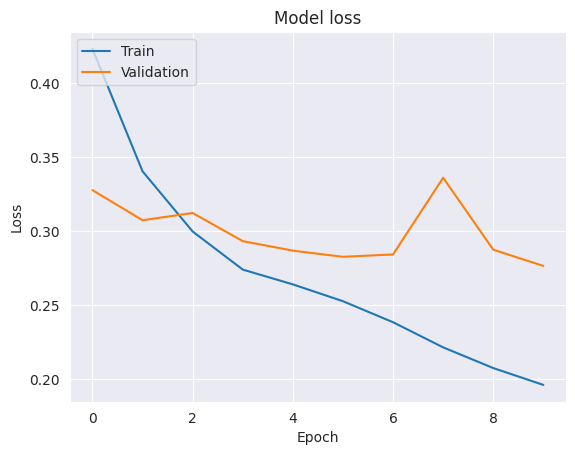

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [59]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step


In [60]:
report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

      Benign       0.86      0.93      0.89       629
   Malignant       0.92      0.85      0.88       629

    accuracy                           0.89      1258
   macro avg       0.89      0.89      0.89      1258
weighted avg       0.89      0.89      0.89      1258



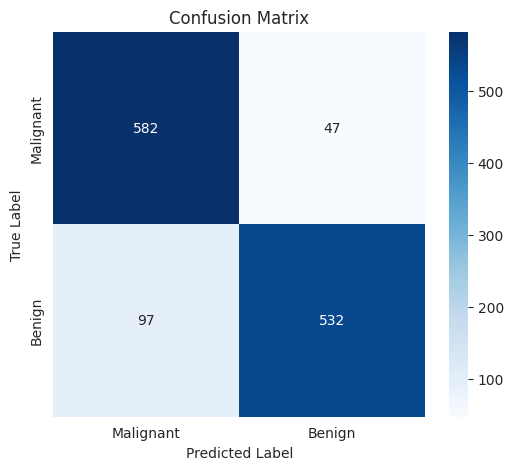

In [61]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [30]:
from tensorflow.keras.applications import InceptionV3

In [31]:
def create_inception_model(input_shape):
   
    base_model = InceptionV3(weights='imagenet', input_shape=input_shape, include_top=False)
    
   
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)
    
    model.add(GaussianNoise(0.25))  
    
    model.add(GlobalAveragePooling2D())  
    
    model.add(Dense(512, activation='relu'))  
    model.add(BatchNormalization())  
    model.add(GaussianNoise(0.25))  
    model.add(Dropout(0.25))  
    
    model.add(Dense(1, activation='sigmoid'))  

    return model

In [33]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise

In [34]:
input_shape = (224, 224, 3)  
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',  
                  metrics=['accuracy'])

In [36]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [37]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10


I0000 00:00:1729686928.096262     139 service.cc:145] XLA service 0x7aaae00156e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729686928.096350     139 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729686928.096359     139 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  2/629 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.4219 - loss: 0.9532   

I0000 00:00:1729686940.121983     139 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


629/629 ━━━━━━━━━━━━━━━━━━━━ 97s 121ms/step - accuracy: 0.7807 - loss: 0.4874 - val_accuracy: 0.8561 - val_loss: 0.3548
Epoch 2/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.8461 - loss: 0.3580 - val_accuracy: 0.8672 - val_loss: 0.3203
Epoch 3/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.8582 - loss: 0.3326 - val_accuracy: 0.8768 - val_loss: 0.3135
Epoch 4/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 30s 46ms/step - accuracy: 0.8694 - loss: 0.3078 - val_accuracy: 0.8665 - val_loss: 0.3426
Epoch 5/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.8782 - loss: 0.2898 - val_accuracy: 0.8704 - val_loss: 0.3263
Epoch 6/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.8821 - loss: 0.2773 - val_accuracy: 0.8712 - val_loss: 0.3087
Epoch 7/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.8899 - loss: 0.2671 - val_accuracy: 0.8577 - val_loss: 0.3121
Epoch 8/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.8959 - loss: 0.2478 - val_accura

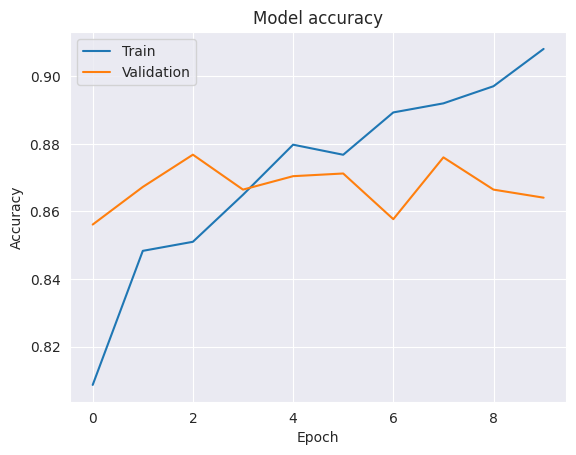

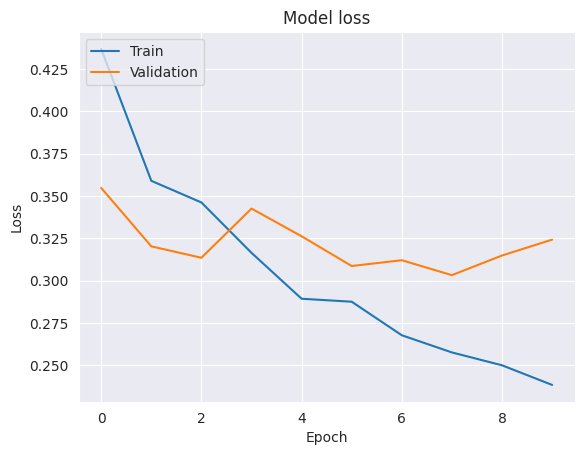

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 146ms/step


In [41]:
report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

      Benign       0.90      0.87      0.89       629
   Malignant       0.88      0.90      0.89       629

    accuracy                           0.89      1258
   macro avg       0.89      0.89      0.89      1258
weighted avg       0.89      0.89      0.89      1258



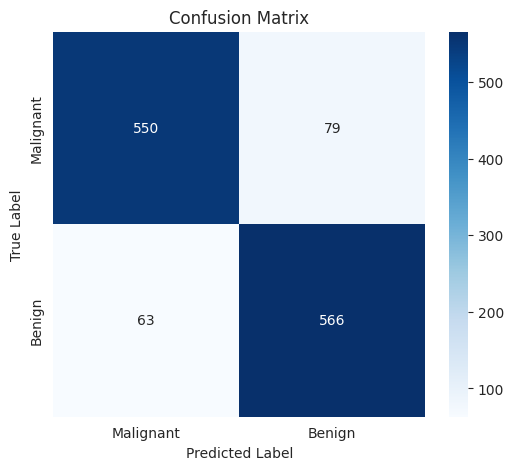

In [42]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [43]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

In [44]:
def predict_image(model, image_path):
    processed_img = preprocess_image(image_path)
    prediction = model.predict(processed_img)
    return prediction

In [47]:
image_path = '/kaggle/input/melanoma-cancer-dataset/test/Malignant/5602.jpg'  
prediction = predict_image(cnn_model, image_path)

if prediction[0][0] >= 0.5:
    print(f"Prediction: Malignant ({prediction[0][0]:.2f} confidence)")
else:
    print(f"Prediction: Benign ({prediction[0][0]:.2f} confidence)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction: Malignant (0.81 confidence)


In [48]:
import time

def predict_image_with_time(model, image_path):
    processed_img = preprocess_image(image_path)
    start_time = time.time()
    prediction = model.predict(processed_img)
    end_time = time.time()
    prediction_time = end_time - start_time
    return prediction, prediction_time

In [49]:
image_path = '/kaggle/input/melanoma-cancer-dataset/test/Malignant/5602.jpg'  
prediction, prediction_time = predict_image_with_time(cnn_model, image_path)

if prediction[0][0] >= 0.5:
    print(f"Prediction: Malignant ({prediction[0][0]:.2f} confidence)")
else:
    print(f"Prediction: Benign ({prediction[0][0]:.2f} confidence)")

print(f"Time taken for prediction: {prediction_time:.4f} seconds")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction: Malignant (0.81 confidence)
Time taken for prediction: 0.0777 seconds


### 1. **CNN Model:**
- **Benign:**
  - Precision: 0.86
  - Recall: 0.88
  - F1-score: 0.87
- **Malignant:**
  - Precision: 0.88
  - Recall: 0.85
  - F1-score: 0.87
- **Overall Accuracy**: 0.87
- **Macro Avg/Weighted Avg F1-score**: 0.87

**Analysis**: The CNN model without regularization performs well with a balanced precision, recall, and f1-score for both classes. Overall, the accuracy is 87%, and the performance is consistent across metrics.

### 2. **CNN Model with Regularization:**
- **Benign:**
  - Precision: 0.91
  - Recall: 0.63
  - F1-score: 0.75
- **Malignant:**
  - Precision: 0.72
  - Recall: 0.94
  - F1-score: 0.81
- **Overall Accuracy**: 0.79
- **Macro Avg/Weighted Avg F1-score**: 0.78

**Analysis**: Adding regularization negatively impacted performance, especially for the **Benign** class, with a sharp decline in recall (0.63). The **Malignant** class benefits from improved recall but at the cost of reduced precision. Overall, accuracy and f1-scores dropped to 79%, indicating a potential imbalance in how the model is generalizing across classes.

### 3. **Xception Model:**
- **Benign:**
  - Precision: 0.86
  - Recall: 0.93
  - F1-score: 0.89
- **Malignant:**
  - Precision: 0.92
  - Recall: 0.85
  - F1-score: 0.88
- **Overall Accuracy**: 0.89
- **Macro Avg/Weighted Avg F1-score**: 0.89

**Analysis**: The Xception model shows strong performance with high precision and recall for both **Benign** and **Malignant** classes. Accuracy of 89% and balanced f1-scores indicate good generalization. This is a clear improvement over both the CNN and the regularized CNN models.

### 4. **Inception Model:**
- **Benign:**
  - Precision: 0.90
  - Recall: 0.87
  - F1-score: 0.89
- **Malignant:**
  - Precision: 0.88
  - Recall: 0.90
  - F1-score: 0.89
- **Overall Accuracy**: 0.89
- **Macro Avg/Weighted Avg F1-score**: 0.89

**Analysis**: The Inception model performs similarly to Xception, with 89% accuracy and nearly equal precision, recall, and f1-scores across both classes. This model strikes a good balance between both **Benign** and **Malignant** detection.

### **Conclusion:**
- The **CNN with regularization** struggled with class imbalance, especially for the **Benign** class.
- **Xception and Inception** models achieved the best performance, with both reaching 89% accuracy and well-balanced precision, recall, and f1-scores.
- Between **Xception and Inception**, the performance is very close, and either model could be chosen based on other factors like computational efficiency or ease of deployment.

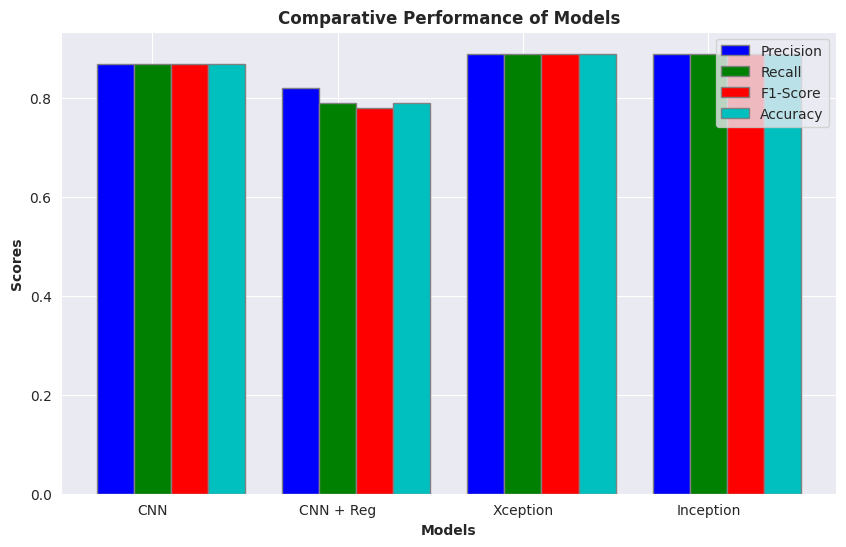

In [50]:
models = ['CNN', 'CNN + Reg', 'Xception', 'Inception']
precision = [0.87, 0.82, 0.89, 0.89]
recall = [0.87, 0.79, 0.89, 0.89]
f1_score = [0.87, 0.78, 0.89, 0.89]
accuracy = [0.87, 0.79, 0.89, 0.89]

bar_width = 0.2

r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.figure(figsize=(10, 6))
plt.bar(r1, precision, color='b', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='r', width=bar_width, edgecolor='grey', label='F1-Score')
plt.bar(r4, accuracy, color='c', width=bar_width, edgecolor='grey', label='Accuracy')

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Comparative Performance of Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)

plt.legend()

plt.show()